In [1]:
from src.helpers import setup_env

# If running locally, this will download dataset (make sure you have at 
# least 2 Gb of space on your hard drive)
setup_env()

/usr/local/lib/python3.9/dist-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")


GPU available
Dataset already downloaded. If you need to re-download, please delete the directory landmark_images
Reusing cached mean and std


## Step 1: Data

In this section, first complete the pre-processing and data-loading part.

Open the file `src/data.py`. It contains a function called `get_data_loaders`.  executing the following cell to the function:

In [2]:
!pip install --upgrade pytest attrs

In [4]:
!pytest -vv src/data.py -k data_loaders

============================= test session starts ==============================
platform linux -- Python 3.9.16, pytest-7.4.2, pluggy-1.0.0 -- /usr/bin/python3.9
cachedir: .pytest_cache
rootdir: /notebooks
plugins: anyio-3.6.2
collected 4 items / 1 deselected / 3 selected                                  

src/data.py::test_data_loaders_keys PASSED                               [ 33%]
src/data.py::test_data_loaders_output_type PASSED                        [ 66%]
src/data.py::test_data_loaders_output_shape PASSED                       [100%]

=============================== warnings summary ===============================
../usr/local/lib/python3.9/dist-packages/torchvision/io/image.py:13
  /usr/local/lib/python3.9/dist-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
    warn(f"Failed to load image Python extension: {e}")

-- Docs: https://docs.pytest.org/en/stable/h

### Visualize a Batch of Training Data

Go back to `src/data.py` and complete the function `visualize_one_batch`. execute the following cell and make sure the test `src/data.py::test_visualize_one_batch` is `PASSED`:

In [5]:
!pytest -vv src/data.py -k visualize_one_batch

============================= test session starts ==============================
platform linux -- Python 3.9.16, pytest-7.4.2, pluggy-1.0.0 -- /usr/bin/python3.9
cachedir: .pytest_cache
rootdir: /notebooks
plugins: anyio-3.6.2
collected 4 items / 3 deselected / 1 selected                                  

src/data.py::test_visualize_one_batch PASSED                             [100%]

=============================== warnings summary ===============================
../usr/local/lib/python3.9/dist-packages/torchvision/io/image.py:13
  /usr/local/lib/python3.9/dist-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
    warn(f"Failed to load image Python extension: {e}")

-- Docs: https://docs.pytest.org/en/stable/how-to/capture-warnings.html
================== 1 passed, 3 deselected, 1 warning in 2.38s ==================


We can now use the code just completed to get a batch of images from train data loader and look at them.

Visualizing the output of your data loader is a great way to ensure that the data loading and preprocessing (including transforms such as rotations, translations, color transforms...) are working as expected.

Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2697, 0.2706, 0.3017])
Reusing cached mean and std
Reusing cached mean and std


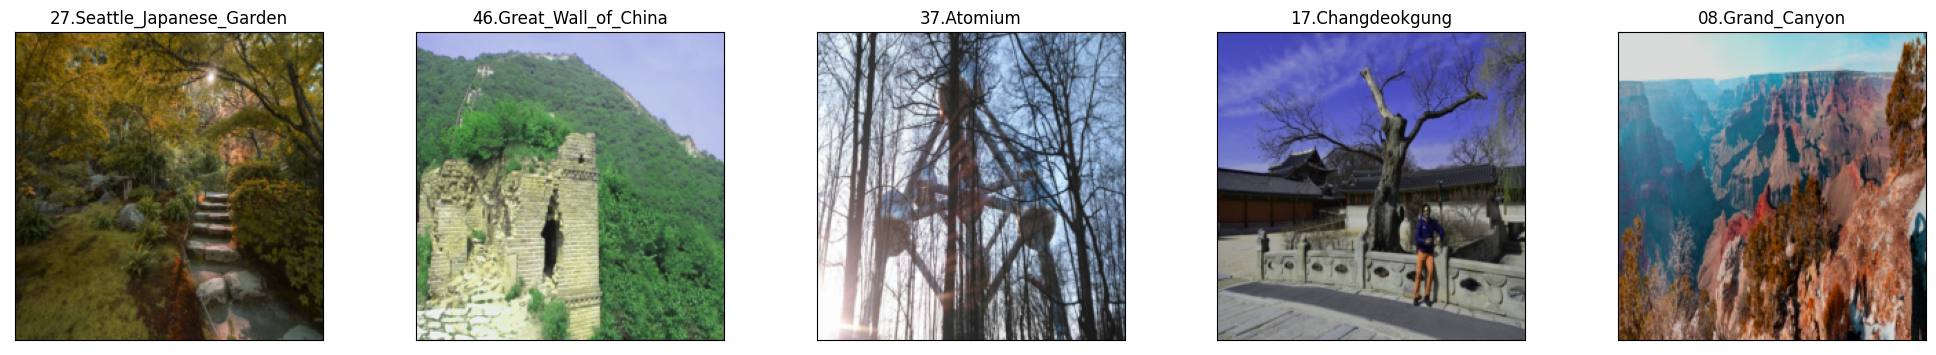

In [6]:
%matplotlib inline
from src.data import *

# use get_data_loaders to get the data_loaders dictionary. Use a batch_size
# of 5, a validation size of 0.01 and num_workers=-1 (all CPUs)
data_loaders = get_data_loaders(5, 0.01, num_workers=-1, img_size=224, rand_augment_magnitude=5)

visualize_one_batch(data_loaders)

---
## Step 2: Define model

Open `src/model.py` and complete the `MyModel` class , execute the following test and make sure it passes:

In [7]:
!pytest -vv src/model.py

============================= test session starts ==============================
platform linux -- Python 3.9.16, pytest-7.4.2, pluggy-1.0.0 -- /usr/bin/python3.9
cachedir: .pytest_cache
rootdir: /notebooks
plugins: anyio-3.6.2
collected 5 items                                                              

src/model.py::test_data_loaders_keys <- src/data.py PASSED               [ 20%]
src/model.py::test_data_loaders_output_type <- src/data.py PASSED        [ 40%]
src/model.py::test_data_loaders_output_shape <- src/data.py PASSED       [ 60%]
src/model.py::test_visualize_one_batch <- src/data.py PASSED             [ 80%]
src/model.py::test_model_construction PASSED                             [100%]

=============================== warnings summary ===============================
../usr/local/lib/python3.9/dist-packages/torchvision/io/image.py:13
  /usr/local/lib/python3.9/dist-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so:

 ***Question***: Outline the steps I took to get to my final CNN architecture and my reasoning at each step.  

 __Answer:__ I decided to use a relative complex resnet architecture like residual connections, global average pooling instead of fully connected layers, which can have adaptibility on input image sizes, and add skip connections, to avoid vashing gradients.

---
## Step 3: define loss and optimizer

Open `src/optimization.py` and complete the `get_loss` function, then execute the test and make sure it passes:

In [8]:
!pytest -vv src/optimization.py -k get_loss

============================= test session starts ==============================
platform linux -- Python 3.9.16, pytest-7.4.2, pluggy-1.0.0 -- /usr/bin/python3.9
cachedir: .pytest_cache
rootdir: /notebooks
plugins: anyio-3.6.2
collected 7 items / 6 deselected / 1 selected                                  

src/optimization.py::test_get_loss PASSED                                [100%]

======================= 1 passed, 6 deselected in 0.79s ========================


Then, in the same file, complete the `get_optimizer` function then execute its tests, and make sure they all pass:

In [9]:
!pytest -vv src/optimization.py -k get_optimizer

============================= test session starts ==============================
platform linux -- Python 3.9.16, pytest-7.4.2, pluggy-1.0.0 -- /usr/bin/python3.9
cachedir: .pytest_cache
rootdir: /notebooks
plugins: anyio-3.6.2
collected 7 items / 1 deselected / 6 selected                                  

src/optimization.py::test_get_optimizer_type PASSED                      [ 16%]
src/optimization.py::test_get_optimizer_is_linked_with_model PASSED      [ 33%]
src/optimization.py::test_get_optimizer_returns_adam PASSED              [ 50%]
src/optimization.py::test_get_optimizer_sets_learning_rate PASSED        [ 66%]
src/optimization.py::test_get_optimizer_sets_momentum PASSED             [ 83%]
src/optimization.py::test_get_optimizer_sets_weight_decat PASSED         [100%]

======================= 6 passed, 1 deselected in 0.79s ========================


---
## Step 4: Train and Validate the Model

> Testing ML code is notoriously difficult. The tests in this section merely exercise the functions you are completing, so it will help you catching glaring problems but it won't guarantee that your training code is bug-free. If you see that your loss is not decreasing, for example, that's a sign of a bug or of a flawed model design. Use your judgement.

Open `src/train.py` and complete the `train_one_epoch` function, then run the tests:

In [11]:
!pip install livelossplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 67.4 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 kB 13.6 MB/s eta 0:00:00


In [12]:
!pytest -vv src/train.py -k train_one_epoch

============================= test session starts ==============================
platform linux -- Python 3.9.16, pytest-7.4.2, pluggy-1.0.0 -- /usr/bin/python3.9
cachedir: .pytest_cache
rootdir: /notebooks
plugins: anyio-3.6.2
collected 4 items / 3 deselected / 1 selected                                  

src/train.py::test_train_one_epoch PASSED                                [100%]

=============================== warnings summary ===============================
../usr/local/lib/python3.9/dist-packages/torchvision/io/image.py:13
  /usr/local/lib/python3.9/dist-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
    warn(f"Failed to load image Python extension: {e}")

-- Docs: https://docs.pytest.org/en/stable/how-to/capture-warnings.html
================= 1 passed, 3 deselected, 1 warning in 20.41s ==================


Now complete the `valid` function, then run the tests:

In [13]:
!pytest -vv src/train.py -k valid_one_epoch

============================= test session starts ==============================
platform linux -- Python 3.9.16, pytest-7.4.2, pluggy-1.0.0 -- /usr/bin/python3.9
cachedir: .pytest_cache
rootdir: /notebooks
plugins: anyio-3.6.2
collected 4 items / 3 deselected / 1 selected                                  

src/train.py::test_valid_one_epoch PASSED                                [100%]

=============================== warnings summary ===============================
../usr/local/lib/python3.9/dist-packages/torchvision/io/image.py:13
  /usr/local/lib/python3.9/dist-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
    warn(f"Failed to load image Python extension: {e}")

-- Docs: https://docs.pytest.org/en/stable/how-to/capture-warnings.html
================= 1 passed, 3 deselected, 1 warning in 10.10s ==================


Now complete the `optimize` function, then run the tests:

In [14]:
!pytest -vv src/train.py -k optimize

============================= test session starts ==============================
platform linux -- Python 3.9.16, pytest-7.4.2, pluggy-1.0.0 -- /usr/bin/python3.9
cachedir: .pytest_cache
rootdir: /notebooks
plugins: anyio-3.6.2
collected 4 items / 3 deselected / 1 selected                                  

src/train.py::test_optimize PASSED                                       [100%]

=============================== warnings summary ===============================
../usr/local/lib/python3.9/dist-packages/torchvision/io/image.py:13
  /usr/local/lib/python3.9/dist-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
    warn(f"Failed to load image Python extension: {e}")

-- Docs: https://docs.pytest.org/en/stable/how-to/capture-warnings.html
================= 1 passed, 3 deselected, 1 warning in 27.76s ==================


Finally, complete the `test` function then run the tests:

In [15]:
!pytest -vv src/train.py -k one_epoch_test

============================= test session starts ==============================
platform linux -- Python 3.9.16, pytest-7.4.2, pluggy-1.0.0 -- /usr/bin/python3.9
cachedir: .pytest_cache
rootdir: /notebooks
plugins: anyio-3.6.2
collected 4 items / 3 deselected / 1 selected                                  

src/train.py::test_one_epoch_test PASSED                                 [100%]

=============================== warnings summary ===============================
../usr/local/lib/python3.9/dist-packages/torchvision/io/image.py:13
  /usr/local/lib/python3.9/dist-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
    warn(f"Failed to load image Python extension: {e}")

-- Docs: https://docs.pytest.org/en/stable/how-to/capture-warnings.html
================= 1 passed, 3 deselected, 1 warning in 14.88s ==================


---
##  Step 5: Putting everything together

Allright, good job getting here! Now it's time to see if all the hard work pays off. In the following cell I will train my model and validate it against the validation set.

Let's start by defining a few hyperparameters.

In [1]:
import tempfile
import torch
import numpy as np
import livelossplot
from livelossplot import PlotLosses
from livelossplot.outputs import MatplotlibPlot
from tqdm import tqdm
from src.model import *
from src.optimization import *
from src.train import *
from src.data import *

/usr/local/lib/python3.9/dist-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")


In [2]:
batch_size = 32       # size of the minibatch for stochastic gradient descent (or Adam)
valid_size = 0.2       # fraction of the training data to reserve for validation
n_epochs = 10      # number of epochs for training
num_classes = 50       # number of classes. Do not change this
dropout = 0.6      # dropout for our model
learning_rate = 0.001 # Learning rate for SGD (or Adam)
opt = 'adam'            # optimizer. 'sgd' or 'adam'
weight_decay = 1e-2  # regularization. Increase this to combat overfitting
img_size=224    # transformation 

factor=0.5 # scheduler parameter
patience=3 # scheduler parameter

In [3]:
# get the data loaders

data_loaders = get_data_loaders(batch_size, valid_size, num_workers=-1, img_size=img_size)
# instance model
model =  MyModel(num_classes, dropout)
model.load_state_dict(torch.load("model_scratch_weights.pt"))

# Get the optimizer using get_optimizer and the model you just created, the learning rate,
# the optimizer and the weight decay specified in the previous cell
optimizer = get_optimizer(model, opt, learning_rate, weight_decay)
scheduler=torch.optim.lr_scheduler.ReduceLROnPlateau( optimizer, "min",
                                                    factor=factor, patience=patience)
# Get the loss using get_loss
loss = get_loss()

Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2697, 0.2706, 0.3017])
Reusing cached mean and std


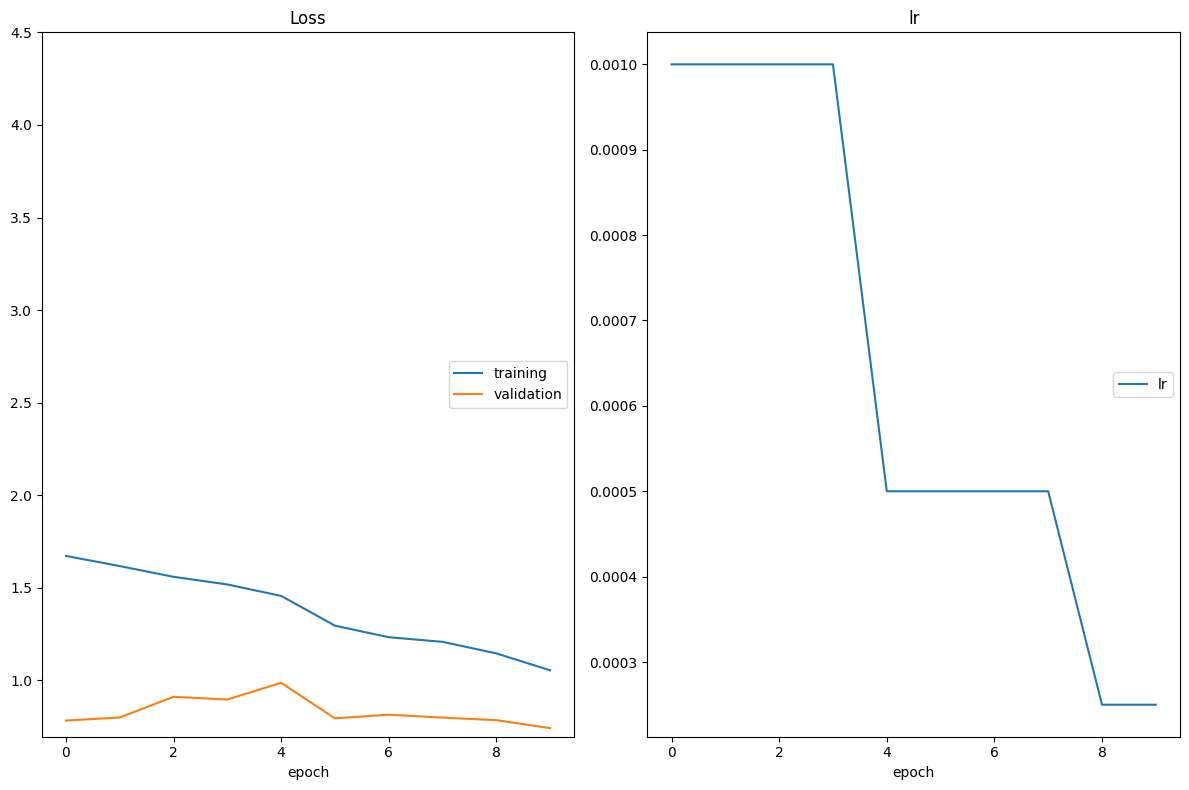

In [4]:
optimize(data_loaders,
         model,
         optimizer,
         scheduler,
         loss,
         n_epochs,
         "model_scratch_weights.pt",
         True
)

### How to improve the training results:

#### things that have worked for me-- 
    1. make model complex to extract more features, skip connections can work well with the probloem for vanishing gradients.
    
    2. L2 regularzition weight_decay, Drop-out rate at 0.6 for my model to combat the overfitting. 
       Schedular on LRonPlateau hepled when went into local minimum.
   
    3. Good choice of data transformations. erased the random crop(), autoaugment() improved trainig.
    
    4. Continuasly adding data augmentations to overcome overfitting 
       when valid loss not change or decrease.
    
    
#### things that havn't work -- 
    1. data augmentations haven't helped with underfitting using simple network. 
                              
    2. lr , schedular, drop_out ...experiments haven't imporved the model performance with simple network. 
    

---
##  Step 6: testing against the Test Set

>  only run this *after* you have completed hyperpameter optimization. Do not optimize hyperparameters by looking at the results on the test set
Run the code cell below to try out your model on the test dataset of landmark images. Ensure that your test accuracy is greater than 50%.

In [5]:
model = MyModel(num_classes, dropout)
model.load_state_dict(torch.load("model_scratch_weights.pt"))

# Run test
one_epoch_test(data_loaders['test'], model, loss)

Testing: 100%|██████████████████████████████████| 40/40 [00:07<00:00,  5.10it/s]

Test Loss: 1.769511


Test Accuracy: 58% (727/1250)


1.7695106212049725

---
##  Step 7: Export using torchscript

Great job ! Now let's export it so we can use it in our app.

But first, as usual, we need to complete some code!

Open `src/predictor.py` and fill up the missing code, then run the tests:

In [6]:
!pytest -vv src/predictor.py

============================= test session starts ==============================
platform linux -- Python 3.9.16, pytest-7.4.2, pluggy-1.0.0 -- /usr/bin/python3.9
cachedir: .pytest_cache
rootdir: /notebooks
plugins: anyio-3.6.2
collected 1 item                                                               

src/predictor.py::test_model_construction PASSED                         [100%]

=============================== warnings summary ===============================
../usr/local/lib/python3.9/dist-packages/torchvision/io/image.py:13
  /usr/local/lib/python3.9/dist-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
    warn(f"Failed to load image Python extension: {e}")

-- Docs: https://docs.pytest.org/en/stable/how-to/capture-warnings.html
========================= 1 passed, 1 warning in 3.10s =========================


Allright, now we are ready to export the model using Predictor class:

In [7]:
# NOTE: you might need to restart the notebook before running this step
# If you get an error about RuntimeError: Can't redefine method: forward on class
# restart your notebook then execute only this cell
from src.predictor import Predictor
from src.helpers import compute_mean_and_std
from src.model import MyModel
from src.data import get_data_loaders
import torch

data_loaders = get_data_loaders(batch_size=1)

# First let's get the class names from our data loaders
class_names = data_loaders["train"].dataset.classes

# Then let's move the model_transfer to the CPU
# (we don't need GPU for inference)
model = MyModel(50, 0.6).cpu()

# Let's make sure we use the right weights by loading the
# best weights we have found during training
# NOTE: remember to use map_location='cpu' so the weights
# are loaded on the CPU (and not the GPU)
checkpoint_path = "model_scratch_weights.pt"
model.load_state_dict(torch.load(checkpoint_path, map_location='cpu'))

# Let's wrap our model using the predictor class
mean, std = compute_mean_and_std()
predictor = Predictor(model, class_names, mean, std).cpu()

# Export using torch.jit.script
scripted_predictor =  torch.jit.script(predictor)

scripted_predictor.save("original_exported.pt")

Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2697, 0.2706, 0.3017])
Reusing cached mean and std
Reusing cached mean and std


Now let's make sure the exported model has the same performance as the original one, by reloading it and testing it. The Predictor class takes different inputs than the non-wrapped model, so we have to use a specific test loop:

In [8]:
import torch

# Load using torch.jit.load
model_reloaded =  torch.jit.load("original_exported.pt")

In [9]:
from src.predictor import predictor_test

pred, truth = predictor_test(data_loaders['test'], model_reloaded)

100%|███████████████████████████████████████| 1250/1250 [11:53<00:00,  1.75it/s]

Accuracy: 0.5304


Finally, let's have a look at the confusion matrix of the model we are going to use in production:

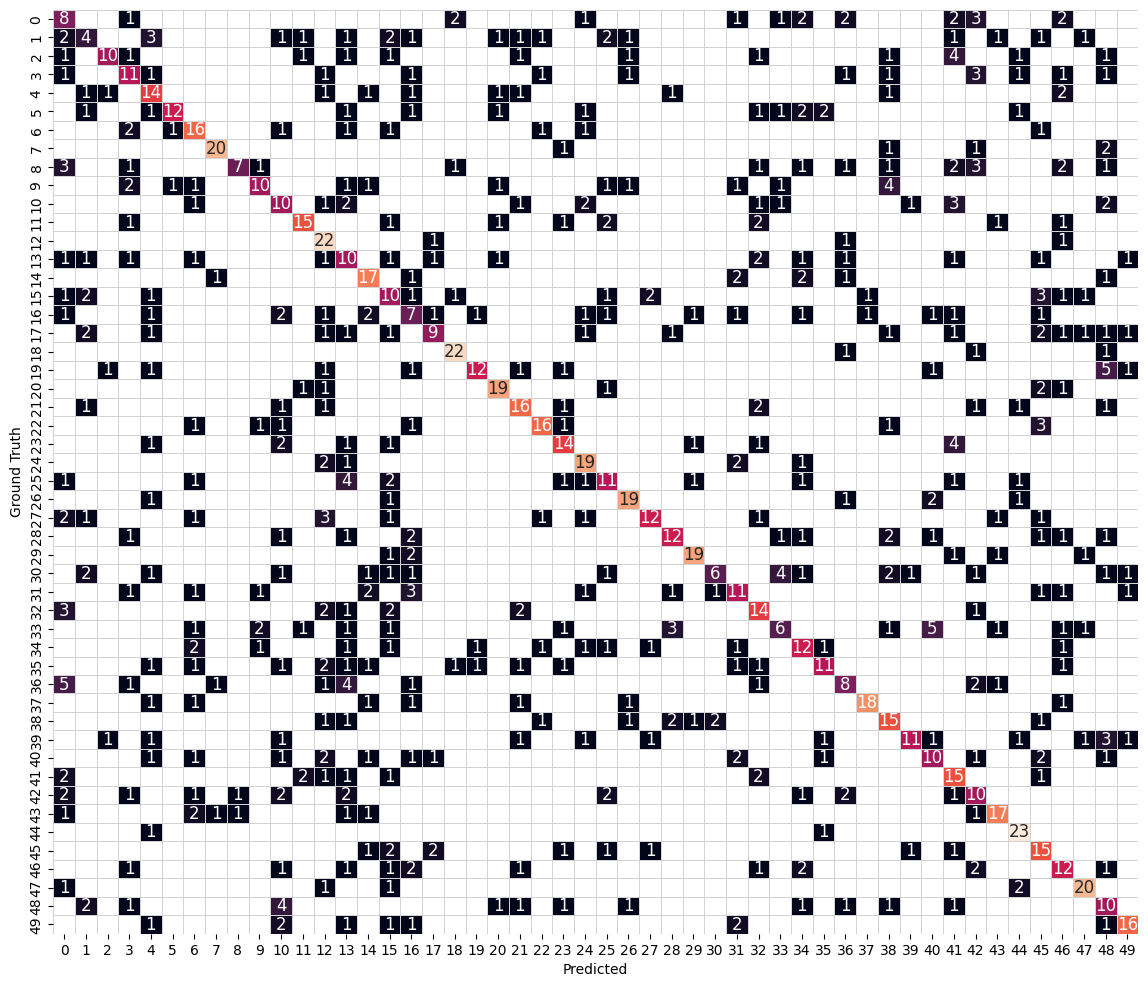

In [10]:
from src.helpers import plot_confusion_matrix

plot_confusion_matrix(pred, truth)